In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset

import scipy.io as sio

In [3]:
directory = '/Users/laura/Documents/scripts/IMEDEA/data/new_cutoffs/'

# Load selected box
mbox = sio.loadmat(directory + 'wnoises_loop_try2_cut.mat')

In [4]:
cut1 = mbox['cut1'][0]

In [5]:
# Load selected box
m = sio.loadmat(directory + 'wnoises_loop_try2.mat')

In [6]:
wf1_1 = m['wf1_1_all'][0,:]
wf1_0 = m['wf1_0_all'][0,:]

Pf_F_1_all = m['Pf_F_1_all']
Pf_HR_all = m['Pf_HR_all']

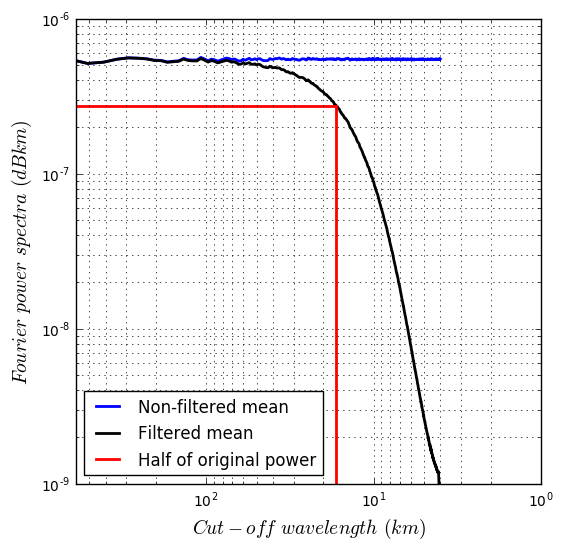

In [7]:
plt.figure(figsize=(6, 6))

plt.xlim([600., 1.])
plt.ylim([1.e-9, 1.e-6])
plt.loglog(wf1_0, Pf_HR_all.mean(axis=0),'b-',linewidth='2')
plt.loglog(wf1_1, Pf_F_1_all[:, 0,:].mean(axis=0),'k-',linewidth='2')

plt.xlabel('$Cut-off$ $wavelength$ $(km)$', size='14')
plt.ylabel('$Fourier$ $power$ $spectra$ $(dBkm)$', size='14')

vcut = Pf_HR_all.mean(axis=0)[-1] / 2.

plt.loglog([600., cut1[0]], [vcut, vcut], 'r', linewidth='2')
plt.loglog([cut1[0], cut1[0]], [1.e-9, vcut], 'r', linewidth='2')

grid(b=True, which='minor')
grid(b=True, which='major')

plt.legend(('Non-filtered mean', 'Filtered mean'
            , 'Half of original power'), loc='lower left') #numpoints=1, 
#Mean of non-filtered white noises last point / 2

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'A1' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)

plt.show()
